Student Name : Rami Soussi  

Student Number : 0583600 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [2]:
data = pd.read_csv('train-data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
def change_string_to_number(ch):
    ch1 = ''
    if str(ch) == 'nan' : return(0) 
    if str(ch) == 'null bhp' :  return(0)
    for i in str(ch) :
        if i in ['1','2','3','4','5','6','7','8','9','0','.'] : ch1 = ch1 + i     
    return(float(ch1) )

In [4]:
n = data.shape[0]
for i in range(n) :
    data['Mileage'][i] = change_string_to_number(data['Mileage'][i])
    data['Engine'][i] = change_string_to_number(data['Engine'][i])
    data['Power'][i] = change_string_to_number(data['Power'][i])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [5]:
original_data = data.copy()

In [6]:
def normalisation(X):
    maxi , mini = max(X) , min(X)
    return (X - mini) / (maxi - mini)

In [7]:
data['Year']= normalisation(data['Year'])
data['Kilometers_Driven']= normalisation(data['Kilometers_Driven'])
data['Power']= normalisation(data['Power'])
data['Engine']= normalisation(data['Engine'])
data['Mileage']= normalisation(data['Mileage'])

In [8]:
y = data['Price']

In [9]:
count_Location = len(set(data['Location']))
count_Name = len(set(data['Name']))
Count_Fuel_type = len(set(data['Fuel_Type']))
Count_Owner_type = len(set(data['Owner_Type']))
Count_Transmission = len(set(data['Transmission']))

print('count_Location : ',count_Location,'\ncount_Name : ',count_Name,'\nCount_Fuel_type : ',Count_Fuel_type,
      '\nCount_Owner_type : ',Count_Owner_type,'\nCount_Transmission : ',Count_Transmission)

count_Location :  11 
count_Name :  1876 
Count_Fuel_type :  5 
Count_Owner_type :  4 
Count_Transmission :  2


In [10]:
Fuel_type_values = set(data['Fuel_Type'])
Owner_type_values = set(data['Owner_Type'])
Transmission_values = set(data['Transmission'])

print('Fuel_type_values : ',Fuel_type_values,'\nOwner_type_values : ',Owner_type_values,'\nTransmission_values : ',Transmission_values)

Fuel_type_values :  {'Petrol', 'CNG', 'Diesel', 'Electric', 'LPG'} 
Owner_type_values :  {'Second', 'Third', 'First', 'Fourth & Above'} 
Transmission_values :  {'Manual', 'Automatic'}


In [11]:
data.groupby('Transmission').mean()['Price'].sort_values()

Transmission
Manual        5.332703
Automatic    19.843971
Name: Price, dtype: float64

In [12]:
data.groupby('Fuel_Type').mean()['Price'].sort_values()

Fuel_Type
LPG          2.487000
CNG          3.516786
Petrol       5.701100
Diesel      12.840605
Electric    12.875000
Name: Price, dtype: float64

In [13]:
data.groupby('Owner_Type').mean()['Price'].sort_values()

Owner_Type
Fourth & Above    3.280000
Third             5.007257
Second            7.599886
First             9.962445
Name: Price, dtype: float64

In [14]:
data.replace({"LPG":1,"CNG":2,"Petrol":3,"Diesel":4,"Electric":5},inplace=True)
data.replace({"First":1,"Second":2,"Third":3,"Fourth & Above":4},inplace=True)
data.replace({"Manual":0,"Automatic":1},inplace=True)

In [15]:
data['Fuel_Type']= normalisation(data['Fuel_Type'])
data['Owner_Type']= normalisation(data['Owner_Type'])

In [16]:
data = data.drop(columns=['Unnamed: 0','Price','New_Price','Name','Location'])

In [17]:
print(np.sum(data['Seats'].value_counts()))

5977


We remark that there are many Nan values in 'Seats', we are going to replace them by the most redundant value.

In [18]:
data.groupby('Seats').count()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
Seats,,,,,,,,
0.0,1,1,1,1,1,1,1,1
2.0,16,16,16,16,16,16,16,16
4.0,99,99,99,99,99,99,99,99
5.0,5014,5014,5014,5014,5014,5014,5014,5014
6.0,31,31,31,31,31,31,31,31
7.0,674,674,674,674,674,674,674,674
8.0,134,134,134,134,134,134,134,134
9.0,3,3,3,3,3,3,3,3
10.0,5,5,5,5,5,5,5,5


In [19]:
s = []
for i in range(len(data['Seats'])):
    if data['Seats'][i] not in  [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,0] : data['Seats'][i] = 5

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
print(np.sum(data['Seats'].value_counts()))

6019


In [21]:
data['Seats']= normalisation(data['Seats'])
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.571429,0.011051,0.25,0,0.000000,0.793083,0.166389,0.103857,0.5
1,0.809524,0.006282,0.75,0,0.000000,0.586464,0.263755,0.225357,0.5
2,0.619048,0.007051,0.50,0,0.000000,0.542636,0.199900,0.158393,0.5
3,0.666667,0.013359,0.75,0,0.000000,0.619261,0.208069,0.158500,0.7
4,0.714286,0.006231,0.75,1,0.333333,0.453190,0.328109,0.251429,0.5
...,...,...,...,...,...,...,...,...,...
6014,0.761905,0.004184,0.75,0,0.000000,0.846750,0.208069,0.132143,0.5
6015,0.809524,0.015359,0.75,0,0.000000,0.727490,0.186729,0.126786,0.5
6016,0.666667,0.008435,0.75,0,0.333333,0.417412,0.416472,0.200000,0.8
6017,0.714286,0.007051,0.50,0,0.000000,0.563506,0.166389,0.119821,0.5


# Pearson Correlation Coefficient

In [22]:
def pearson_correlation_coeff(X,y):
    coeff = []
    for i in range(X.shape[1]):
        x = X.iloc[:,i]
        xy = x*y
        x_std = np.std(x)
        y_std = np.std(y)
        xy_std = np.mean(xy) - np.mean(x)*np.mean(y)
        correlation_coeff = xy_std/(x_std*y_std)
        coeff.append(correlation_coeff)
    return coeff

In [23]:
coefficients = pearson_correlation_coeff(data,y)
correlation_coefficients = pd.Series(coefficients, name="features_coefficients", index=data.columns)
print(correlation_coefficients)

Year                 0.305327
Kilometers_Driven   -0.011493
Fuel_Type            0.316687
Transmission         0.586025
Owner_Type          -0.097557
Mileage             -0.306191
Engine               0.647232
Power                0.751724
Seats                0.052811
Name: features_coefficients, dtype: float64


In [24]:
print(abs(correlation_coefficients).sort_values(ascending=False))

Power                0.751724
Engine               0.647232
Transmission         0.586025
Fuel_Type            0.316687
Mileage              0.306191
Year                 0.305327
Owner_Type           0.097557
Seats                0.052811
Kilometers_Driven    0.011493
Name: features_coefficients, dtype: float64


# Mutual Information

In [25]:
def mutual_information(X,y):
    Mutual_info = []
    H_y = entropy1(y)
    for i in range(X.shape[1]):
        x = X.iloc[:,i]
        H_x = entropy1(x)
        H_xy = entropy2(x,y)
        I_xy = (H_x + H_y - H_xy)
        Mutual_info.append(I_xy)
    return Mutual_info  

In [26]:
def entropy1(x):
    entropy = 0
    l = len(x)
    for i in set(x):
        p = np.sum(i == np.array(x))/l
        if p != 0 : entropy -= p*np.log2(p)
    return entropy

In [27]:
def entropy2(x,y):
    entropy = 0
    l = len(x)
    for i in set(x):
        x1 = i == np.array(x)
        for j in set(y):
            p = 0
            y1 = j == np.array(y)
            for k in range(len(x)):
                if y1[k]==True and x1[k]==True : p+=1
            p = p/l                
            if p != 0 : entropy -= p*np.log2(p)
    return entropy  

In [28]:
data1 = data.head(5)
y1 = y[0:5]

In [29]:
mutual_information(data1,y1)

[2.321928094887362,
 2.321928094887362,
 1.3709505944546687,
 0.7219280948873625,
 0.7219280948873625,
 2.321928094887362,
 2.321928094887362,
 2.321928094887362,
 0.7219280948873625]

The entropy2 function can't run with a dataset of 6019 samples, that's why I used the built-in Sklearn function : mutual_info_regression

In [30]:
mutual_info_scores = mutual_info_regression(data, y)
mi_scores = pd.Series(mutual_info_scores, name="MI Scores", index=data.columns)
print(mi_scores.sort_values(ascending=False))

Power                0.805852
Engine               0.640817
Mileage              0.463999
Year                 0.273601
Transmission         0.236691
Fuel_Type            0.141495
Seats                0.082588
Kilometers_Driven    0.069603
Owner_Type           0.038652
Name: MI Scores, dtype: float64


# one-way ANOVA

In [31]:
def anova_f_oneway(X,y):
    anova_coeff= []
    for i in range(X.shape[1]):
        x = X.iloc[:,i]
        mean1 = x.mean()
        mean2 = y.mean()
        overall_mean = np.concatenate([y,x]).mean()
        between_group_mean = X.shape[0]*(mean1-overall_mean)**2 + X.shape[0]*(mean2-overall_mean)**2
        y1 = (y - mean2)**2
        y2 = (x - mean1)**2
        degrees_of_freedom = 2*(X.shape[0]-1)
        within_group_mean = (np.sum(y1) + np.sum(y2))/degrees_of_freedom
        f_ratio = between_group_mean/within_group_mean
        anova_coeff.append(f_ratio)
    return anova_coeff    

In [32]:
anova_coefficients = anova_f_oneway(data,y)
anova = pd.Series(anova_coefficients, name="anova_f_oneway_scores", index=data.columns)
print(anova.sort_values(ascending=False))

Kilometers_Driven    4312.877475
Owner_Type           4258.880925
Power                4142.644599
Engine               4079.272480
Transmission         4057.882235
Seats                3853.212944
Mileage              3841.792921
Fuel_Type            3765.191204
Year                 3679.355652
Name: anova_f_oneway_scores, dtype: float64


# Recapitulation of the classifications by three methods

In [33]:
def ranking(x):
    y = x.copy()
    rank = np.zeros(x.shape[0])
    for i in range(1,x.shape[0]+1):
        j = y.argmax()
        rank[j] = i
        y[j] = 0
    rank = rank.astype(int)    
    return(rank)

In [34]:
classif = pd.DataFrame()
classif['Pearson Correlation'] = ranking(abs(correlation_coefficients))
classif['Mutual Information'] = ranking(mi_scores)
classif['one-way ANOVA'] = ranking(anova)
classif.index=data.columns

In [35]:
classif

,Pearson Correlation,Mutual Information,one-way ANOVA
Year,6,4,9
Kilometers_Driven,9,8,1
Fuel_Type,4,6,8
Transmission,3,5,5
Owner_Type,7,9,2
Mileage,5,3,7
Engine,2,2,4
Power,1,1,3
Seats,8,7,6


In [36]:
def ranking_dataframe(X):
    summ = []
    for i in range(X.shape[0]):
        s = sum(classif.iloc[i])
        summ.append(s)
    X['importance ranking'] = summ
    X.sort_values(by=['importance ranking'], inplace=True)
    X['importance ranking'] = range(1,10)
    return X  

In [37]:
ranking_dataframe(classif)

,Pearson Correlation,Mutual Information,one-way ANOVA,importance ranking
Power,1,1,3,1
Engine,2,2,4,2
Transmission,3,5,5,3
Mileage,5,3,7,4
Kilometers_Driven,9,8,1,5
Fuel_Type,4,6,8,6
Owner_Type,7,9,2,7
Year,6,4,9,8
Seats,8,7,6,9


# Multivariate Linear Regression

In [38]:
import numpy

def multivariate_linear_regression_coefficients(X,y):
    n = X.shape[0]
    one = np.ones((n,1))
    X = np.hstack((one,X))
    A = X.transpose()
    D = linalg.inv(A.dot(X))
    B = D.dot(A)
    beta = B.dot(y)
    return beta

In [39]:
def MLR_prediction(X,beta):
    n = X.shape[0]
    one = np.ones((n,1))
    X = np.hstack((one,X))
    y_pred = X.dot(beta)
    return y_pred

In [40]:
def Mean_square_error(y_pred,y_truth):
    n = y_pred.shape[0]
    MSE = (1/n)*np.sum((y_pred-y_truth)**2)
    return MSE

In [41]:
def train_test_split_and_predict(X,y):
    N = int(X.shape[0]*0.8)
    train_set = X.iloc[:N,:]
    train_label_set = y.iloc[:N]
    test_set = X.iloc[N:,:]
    test_label_set = y.iloc[N:]
    
    beta = multivariate_linear_regression_coefficients(train_set,train_label_set)
    
    y_pred = np.array(MLR_prediction(test_set,beta))
    
    MSE = Mean_square_error(y_pred,test_label_set)
    
    print ('Mean Square Error is ',MSE)

In [42]:
MLR_coeff = multivariate_linear_regression_coefficients(data,y)
MLR_Prediction = MLR_prediction(data,MLR_coeff)
Mean_square_error(y,MLR_Prediction)

41.81957348763501

In [43]:
train_test_split_and_predict(data,y)

Mean Square Error is  37.63868639934721


# Simple Linear Regression

In [44]:
def simple_linear_regression(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    cov = sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x)))
    var = sum((x[i]-x_mean)**2 for i in range(len(x)))
    theta_1 = cov/var
    theta_0 = y_mean - theta_1 * x_mean
    z = theta_0 + theta_1 * x
    return (theta_0, theta_1)

In [45]:
def SLR_prediction(x,parameters):
    theta_0 = parameters[0]
    theta_1 = parameters[1]
    return theta_0 + theta_1 * x

In [46]:
def MSE_of_each_feature(X,y):
    MSE_of_features = []
    for i in range(X.shape[1]):
        x = X.iloc[:,i]
        parameters = simple_linear_regression(x,y)
        y_pred = SLR_prediction(x,parameters)
        mse = Mean_square_error(y,y_pred)
        MSE_of_features.append(mse)
    return MSE_of_features        

In [47]:
MSE_of_each_feature = MSE_of_each_feature(data,y)

In [48]:
feature_importance = pd.Series(MSE_of_each_feature, name="MSE_of_each_feature", index=data.columns)
print(feature_importance.sort_values(ascending=True))

Power                 54.428636
Engine                72.722804
Transmission          82.169533
Fuel_Type            112.597413
Mileage              113.415600
Year                 113.481728
Owner_Type           123.957597
Seats                124.799647
Kilometers_Driven    125.132163
Name: MSE_of_each_feature, dtype: float64


# Verifying with sklearn methods

In [49]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.571429,0.011051,0.25,0,0.0,0.793083,0.166389,0.103857,0.5
1,0.809524,0.006282,0.75,0,0.0,0.586464,0.263755,0.225357,0.5


In [50]:
from sklearn.feature_selection import SelectKBest
SelectKBest(k=1).fit_transform(data, y)[:2]

array([[0.10385714],
       [0.22535714]])

In [51]:
SelectKBest(k=2).fit_transform(data, y)[:2]

array([[0.1663888 , 0.10385714],
       [0.26375458, 0.22535714]])

In [52]:
SelectKBest(k=4).fit_transform(data, y)[:2]

array([[0.57142857, 0.        , 0.1663888 , 0.10385714],
       [0.80952381, 0.        , 0.26375458, 0.22535714]])

In [53]:
def best_features(X,y):
    best = []
    for i in range(1,X.shape[1]+1):
        b = SelectKBest(k=i).fit_transform(data, y)[:10]
        for j in range(X.shape[1]):
            for k in range(i):
                if ((b[:,k][1] == X.head(2).iloc[:,j][1]) and (b[:,k][9] == X.head(10).iloc[:,j][9])) and (X.columns[j] not in best) :
                    best.append(X.columns[j])
        print('best',i,'features are: ',best)    

In [54]:
best_features(data,y)

best 1 features are:  ['Power']
best 2 features are:  ['Power', 'Engine']
best 3 features are:  ['Power', 'Engine', 'Transmission']
best 4 features are:  ['Power', 'Engine', 'Transmission', 'Year']
best 5 features are:  ['Power', 'Engine', 'Transmission', 'Year', 'Fuel_Type']
best 6 features are:  ['Power', 'Engine', 'Transmission', 'Year', 'Fuel_Type', 'Mileage']
best 7 features are:  ['Power', 'Engine', 'Transmission', 'Year', 'Fuel_Type', 'Mileage', 'Seats']
best 8 features are:  ['Power', 'Engine', 'Transmission', 'Year', 'Fuel_Type', 'Mileage', 'Seats', 'Kilometers_Driven']
best 9 features are:  ['Power', 'Engine', 'Transmission', 'Year', 'Fuel_Type', 'Mileage', 'Seats', 'Kilometers_Driven', 'Owner_Type']


# Principal Components analysis

In [55]:
def principal_components(X):
    x_bar = np.mean(data,axis = 0)
    x_std = np.std(data,axis = 0)
    X = (data - x_bar)/x_std
    correlation_matrix = X.corr()
    
    eig_values, eig_vectors = linalg.eig(correlation_matrix)

    indices = []
    copy = np.copy(eig_values)
    
    for i in range(9):
        ind = copy.argmax()
        indices.append(ind)
        copy[ind]=0   
    
    v = eig_vectors.T[indices] 
    eig_vectors = v.T
    
    X_pca = pd.DataFrame()
    for i in range(9):
        h = -eig_vectors[:,i]
        pc = np.dot(X,h)
        title = 'PC'+str(i+1)
        X_pca[title] = pc
        
    return X_pca    

In [56]:
X_pca = principal_components(data)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.795670,-0.759913,-0.933044,-0.095366,1.062462,-0.077446,-0.411214,-2.154209,-0.385762
1,-0.150693,0.916662,0.462525,0.222619,-0.355876,0.438995,-0.536386,0.473210,0.256170
2,-1.171737,-0.578518,-0.436430,-0.380683,0.615265,0.518792,-0.227197,-0.252012,0.167242
3,-0.250015,0.045837,2.275026,-0.581288,0.027668,0.255257,0.685706,-0.769120,0.622562
4,1.684301,-0.623266,-0.746340,0.662708,-1.492556,-0.569588,0.755381,0.480042,-0.086046
...,...,...,...,...,...,...,...,...,...
6014,-1.661961,1.277698,0.824558,0.714644,-1.031142,0.616336,-0.090529,-0.643000,-0.164299
6015,-1.426714,0.965001,0.983438,0.948021,-0.302401,0.247282,0.077289,0.100052,0.062902
6016,2.020932,-1.518837,2.675724,-1.702898,-0.974821,-1.057552,0.119269,-0.404896,-0.254450
6017,-1.627725,-0.186796,-0.342423,-0.383006,0.618024,0.098347,-0.006400,-0.015261,0.118352


# Comparison of the variances of the two dataframes

(0, 0.03)

<Figure size 1080x360 with 0 Axes>

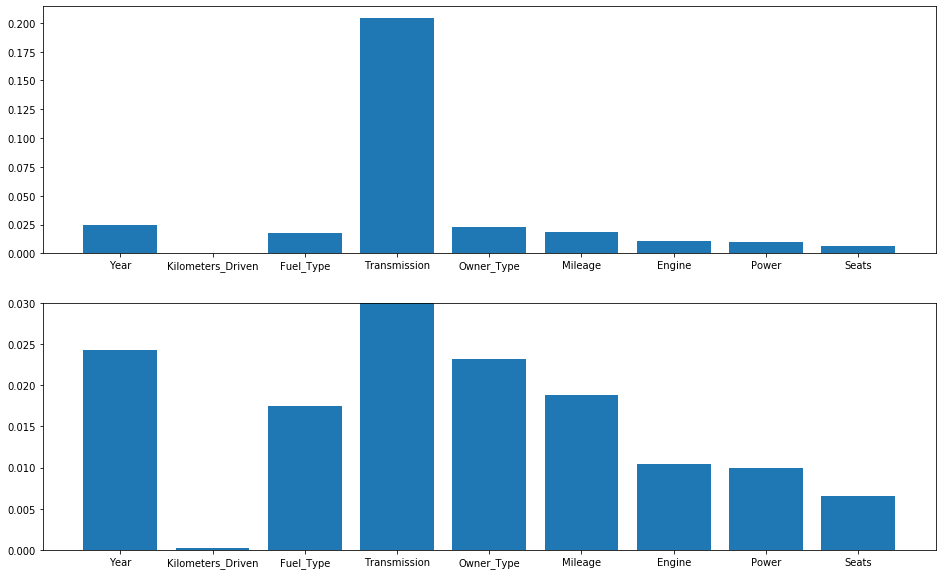

In [57]:
plt.figure(figsize=(15,5))

columns = data.columns
variances = [np.var(data[i]) for i in columns ]

plt.figure(figsize=(16,10))

ax1 = plt.subplot(211)
ax1.bar(columns,variances)


ax2 = plt.subplot(212)
ax2.bar(columns,variances)
plt.ylim(0,0.03)

<BarContainer object of 9 artists>

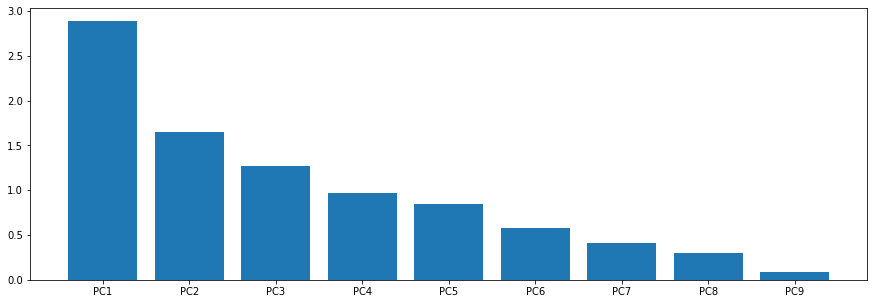

In [58]:
plt.figure(figsize=(15,5))

columns = X_pca.columns
variances = [np.var(X_pca[i]) for i in columns]

plt.bar(columns,variances)

In [59]:
def MSE_of_each_feature(X,y):
    MSE_of_features = []
    for i in range(X.shape[1]):
        x = X.iloc[:,i]
        parameters = simple_linear_regression(x,y)
        y_pred = SLR_prediction(x,parameters)
        mse = Mean_square_error(y,y_pred)
        MSE_of_features.append(mse)
    return MSE_of_features  

In [60]:
MSE_of_each_component = MSE_of_each_feature(X_pca,y)
feature_importance = pd.Series(MSE_of_each_component, name="Mean_Square_Error_of_each_component", index=X_pca.columns)
print(feature_importance.sort_values(ascending=True))

PC1     65.612915
PC2    111.363592
PC3    120.728594
PC4    123.511266
PC7    123.619835
PC6    123.878698
PC8    124.456086
PC9    124.720852
PC5    125.117283
Name: Mean_Square_Error_of_each_component, dtype: float64


# Adding new features to improve the prediction

In [61]:
def loadings(X):
    x_bar = np.mean(data,axis = 0)
    x_std = np.std(data,axis = 0)
    X = (data - x_bar)/x_std
    correlation_matrix = X.corr()
    
    eig_values, eig_vectors = linalg.eig(correlation_matrix)

    indices = []
    copy = np.copy(eig_values)
    
    for i in range(9):
        ind = copy.argmax()
        indices.append(ind)
        copy[ind]=0   
    
    v = eig_vectors.T[indices] 
    eig_vectors = -v.T
    
    loadings = pd.DataFrame(eig_vectors)
    loadings.columns = ['PC'+str(i) for i in range(1,10)]
    loadings.index = data.columns
    
    return loadings

In [62]:
loadings(data)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Year,-0.027803,0.651518,0.025822,-0.038058,0.058484,-0.658152,-0.096830,0.352870,-0.046464
Kilometers_Driven,0.067990,-0.246540,0.347906,0.693442,0.534456,-0.215849,-0.000099,0.019781,0.008292
Fuel_Type,0.258440,0.246948,0.494129,0.274261,-0.465450,0.364262,0.201011,0.385422,0.120652
Transmission,0.390967,0.146936,-0.435677,0.217598,-0.018701,-0.117372,0.721925,-0.214074,-0.085219
Owner_Type,0.044353,-0.537973,-0.035013,0.124964,-0.617613,-0.549055,-0.056859,0.074954,-0.004231
Mileage,-0.382380,0.348411,0.141855,0.353686,-0.322141,-0.017840,-0.111265,-0.673371,-0.131442
Engine,0.553725,0.024489,0.062647,-0.034877,-0.016518,0.057480,-0.363258,-0.096677,-0.736729
Power,0.515381,0.134404,-0.199852,0.114992,-0.027607,-0.009697,-0.460460,-0.237762,0.627490
Seats,0.233555,-0.051959,0.615713,-0.489869,0.087677,-0.261926,0.263533,-0.394703,0.148813


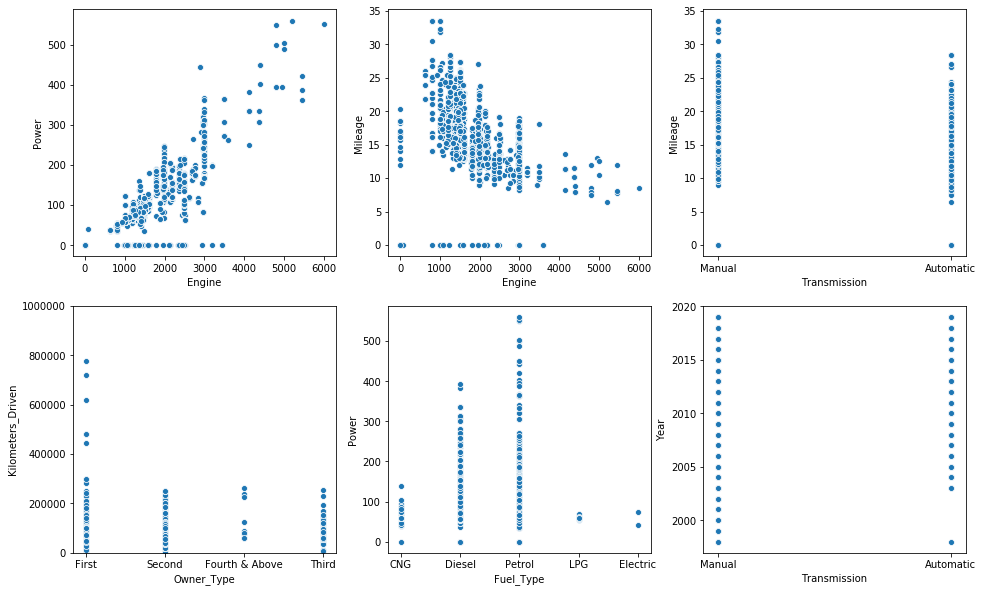

In [63]:
plt.figure(figsize=(16,10))

ax1 = plt.subplot(231)
ax1 = sns.scatterplot(original_data['Engine'],original_data['Power'])

ax2 = plt.subplot(232)
ax2 = sns.scatterplot(original_data['Engine'],original_data['Mileage'])

ax3 = plt.subplot(233)
ax3 = sns.scatterplot(original_data['Transmission'],original_data['Mileage'])

ax4 = plt.subplot(234)
sns.scatterplot(original_data['Owner_Type'],original_data['Kilometers_Driven'])
plt.ylim(0, 1000000)

ax5 = plt.subplot(235)
ax5 = sns.scatterplot(original_data['Fuel_Type'],original_data['Power'])

ax5 = plt.subplot(236)
ax5 = sns.scatterplot(original_data['Transmission'],original_data['Year'])

In [64]:
train_test_split_and_predict(X_pca,y)

Mean Square Error is  37.63868639934753


In [65]:
train_test_split_and_predict(data,y)

Mean Square Error is  37.63868639934721


In [66]:
X1 = data.copy()
X1["Feature1"] = X1.Power * X1.Engine
train_test_split_and_predict(X1,y)

Mean Square Error is  33.209276620109016


In [67]:
X2 = data.copy()
X2["Feature1"] = X2.Power * X2.Engine
X2["Feature2"] = X2.Power / (0.1+X2.Kilometers_Driven)
X2["Feature3"] = X2.Engine / (0.1+X2.Mileage)
train_test_split_and_predict(X2,y)

Mean Square Error is  30.732571039509246


In [68]:
X3 = data.copy()
X3["Feature1"] = X3.Power * X3.Engine
X3["Feature2"] = X3.Power / (0.1+X3.Kilometers_Driven)
X3["Feature3"] = X3.Engine / (0.1+X3.Mileage)
X3["Feature4"] = X3.Kilometers_Driven / (0.1+X3.Year)
train_test_split_and_predict(X3,y)

Mean Square Error is  29.942499215748928
